# Wine Data

In [3]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split 
import pandas as pd 

# 데이터 불러오기 
# ----------------------------------------------
# 0: 주석산 농도 1: 아세트산 농도 2: 구연산 농도
# 3: 잔류 당분 농도 4: 염화나트륨 농도
# 5: 유리 아황산 농도 6: 총 아황산 농도 
# 7: 밀도, 8: PH, 9: 황산칼륨 농도 
# 10: 알코올 도수 11: 와인의 맛(0~10)
# 12: 클래스(레드 와인: 0, 화이트 와인: 1)
# ----------------------------------------------
df = pd.read_csv('data/wine.csv', header=None)
df

# 데이터 구분하기 
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(X.shape, y.shape)

# 데이터 분할하기 
X_train, X_test, t_train, t_test = train_test_split(X, y, test_size=0.2, shuffle=True)
print(X_train.shape, X_test.shape, t_train.shape, t_test.shape)


(6497, 12) (6497,)
(5197, 12) (1300, 12) (5197,) (1300,)


In [ ]:
# 모델 설정하기 
model = Sequential()
model.add(Dense(32, input_dim=12, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델 환경 설정하기(loss, optimizer, metrics 설정)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 딥러닝 모델 학습하기
hist1 = model.fit(X_train, t_train, epochs=100, batch_size=50, verbose=1, validation_split=0.25)

c:\Users\narae\Documents\Python\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/100
78/78 [==============================] - 2s 6ms/step - loss: 2.8626 - accuracy: 0.7000 - val_loss: 0.3159 - val_accuracy: 0.8869
Epoch 2/100
78/78 [==============================] - 0s 4ms/step - loss: 0.3068 - accuracy: 0.8994 - val_loss: 0.2244 - val_accuracy: 0.9192
Epoch 3/100
78/78 [==============================] - 0s 2ms/step - loss: 0.2483 - accuracy: 0.9228 - val_loss: 0.2000 - val_accuracy: 0.9315
Epoch 4/100
78/78 [==============================] - 0s 2ms/step - loss: 0.2262 - accuracy: 0.9276 - val_loss: 0.1911 - val_accuracy: 0.9338
Epoch 5/100
78/78 [==============================] - 0s 2ms/step - loss: 0.2187 - accuracy: 0.9305 - val_loss: 0.1858 - val_accuracy: 0.9369
Epoch 6/100
78/78 [==============================] - 0s 2ms/step - loss: 0.2101 - accuracy: 0.9312 - val_loss: 0.1830 - val_accuracy: 0.9369
Epoch 7/100
78/78 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.9317 - val_loss: 0.1805 - val_accuracy: 0.9377
Epoch 8/100
7

In [ ]:
# 딥러닝 모델 검증하기 
scores = model.evaluate(X_test, t_test)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

scores

41/41 [==============================] - 0s 4ms/step - loss: 0.0539 - accuracy: 0.9838
accuracy: 98.38%


[0.053902316838502884, 0.983846127986908]

<Figure size 1080x360 with 0 Axes>

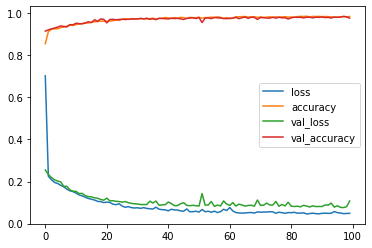

In [ ]:
import matplotlib.pyplot as plt 
# Plot 
df_history = pd.DataFrame(hist1.history)

fig = plt.figure(figsize=(15, 5))
df_history.plot()
plt.show()

# Wine Data 모델 업데이트 

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split 
import pandas as pd 

# 데이터 불러오기 
# ----------------------------------------------
# 0: 주석산 농도 1: 아세트산 농도 2: 구연산 농도
# 3: 잔류 당분 농도 4: 염화나트륨 농도
# 5: 유리 아황산 농도 6: 총 아황산 농도 
# 7: 밀도, 8: PH, 9: 황산칼륨 농도 
# 10: 알코올 도수 11: 와인의 맛(0~10)
# 12: 클래스(레드 와인: 0, 화이트 와인: 1)
# ----------------------------------------------
df = pd.read_csv('data/wine.csv', header=None)
df

# 데이터 구분하기 
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(X.shape, y.shape)

# 데이터 분할하기 
X_train, X_test, t_train, t_test = train_test_split(X, y, test_size=0.2, shuffle=True)
print(X_train.shape, X_test.shape, t_train.shape, t_test.shape)

# 모델 설정하기 
model = Sequential()
model.add(Dense(32, input_dim=12, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델 환경 설정하기(loss, optimizer, metrics 설정)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

(6497, 12) (6497,)
(5197, 12) (1300, 12) (5197,) (1300,)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                416       
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 1)                 17        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


## 1) 모델 저장하기 

### 학습 과정 모두를 저장(너무 용량 많이 차지. 필요한것만 저장할 수 없을까)

In [ ]:
# 모델의 저장 조건 설정 
model_path = 'data/model/wine/' + '{epoch:02d}-{val_accuracy:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = model_path, verbose=1)

In [ ]:
# 딥러닝 모델 학습하기
hist2 = model.fit(X_train, t_train, epochs=100, batch_size=50, verbose=1, 
                  validation_split=0.25, callbacks=[checkpointer])


c:\Users\narae\Documents\Python\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/100
77/78 [============================>.] - ETA: 0s - loss: 0.8691 - accuracy: 0.8353
Epoch 1: saving model to data/model\01-0.9200.hdf5
78/78 [==============================] - 10s 52ms/step - loss: 0.8614 - accuracy: 0.8365 - val_loss: 0.2548 - val_accuracy: 0.9200
Epoch 2/100
74/78 [===========================>..] - ETA: 0s - loss: 0.2081 - accuracy: 0.9246
Epoch 2: saving model to data/model\02-0.9277.hdf5
78/78 [==============================] - 2s 29ms/step - loss: 0.2077 - accuracy: 0.9253 - val_loss: 0.2203 - val_accuracy: 0.9277
Epoch 3/100
78/78 [==============================] - ETA: 0s - loss: 0.1932 - accuracy: 0.9315
Epoch 3: saving model to data/model\03-0.9292.hdf5
78/78 [==============================] - 3s 37ms/step - loss: 0.1932 - accuracy: 0.9315 - val_loss: 0.2064 - val_accuracy: 0.9292
Epoch 4/100
78/78 [==============================] - ETA: 0s - loss: 0.1837 - accuracy: 0.9333
Epoch 4: saving model to data/model\04-0.9246.hdf5
78/78 [==================

In [ ]:
hist2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
df_hidtory = pd.DataFrame(hist2.history)
df_history

,loss,accuracy,val_loss,val_accuracy
0,0.702821,0.855530,0.254944,0.915385
1,0.225094,0.912753,0.233832,0.921538
2,0.209080,0.924301,0.219036,0.926154
3,0.195831,0.926354,0.207996,0.930000
4,0.191121,0.926354,0.202593,0.934615
...,...,...,...,...
95,0.052044,0.982037,0.084942,0.980769
96,0.050511,0.983064,0.077221,0.982308
97,0.047288,0.984604,0.076360,0.985385
98,0.048217,0.982551,0.080293,0.983846


<AxesSubplot:>

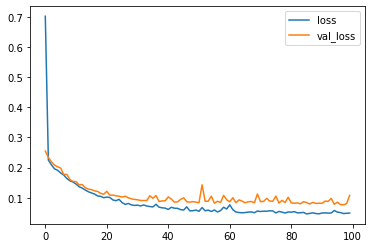

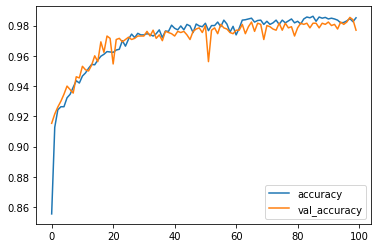

In [ ]:
df_history[['loss', 'val_loss']].plot()
df_history[['accuracy', 'val_accuracy']].plot()

### 최고의 결과를 찾을 때마다 저장

In [ ]:
# 모델의 저장 조건 설정 
model_path = 'data/model/wine2/' + '{epoch:02d}-{val_accuracy:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = model_path, verbose=1, save_best_only=True)

In [ ]:
# 딥러닝 모델 학습하기
hist3 = model.fit(X_train, t_train, epochs=100, batch_size=50, verbose=1, 
                  validation_split=0.25, callbacks=[checkpointer])


c:\Users\narae\Documents\Python\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/100
77/78 [============================>.] - ETA: 0s - loss: 0.0388 - accuracy: 0.9904
Epoch 1: val_loss improved from inf to 0.09437, saving model to data/model/wine2\01-0.9823.hdf5
78/78 [==============================] - 2s 29ms/step - loss: 0.0385 - accuracy: 0.9905 - val_loss: 0.0944 - val_accuracy: 0.9823
Epoch 2/100
75/78 [===========================>..] - ETA: 0s - loss: 0.0439 - accuracy: 0.9883
Epoch 2: val_loss did not improve from 0.09437
78/78 [==============================] - 2s 27ms/step - loss: 0.0429 - accuracy: 0.9885 - val_loss: 0.1066 - val_accuracy: 0.9785
Epoch 3/100
78/78 [==============================] - ETA: 0s - loss: 0.0403 - accuracy: 0.9895
Epoch 3: val_loss did not improve from 0.09437
78/78 [==============================] - 2s 29ms/step - loss: 0.0403 - accuracy: 0.9895 - val_loss: 0.1023 - val_accuracy: 0.9746
Epoch 4/100
74/78 [===========================>..] - ETA: 0s - loss: 0.0413 - accuracy: 0.9905
Epoch 4: val_loss did not improve from 0

# Wine Data 그래프로 과적합 확인하기 

In [ ]:
# 딥러닝 모델 학습하기
hist4 = model.fit(X_train, t_train, epochs=2000, batch_size=500,
                  verbose=1, validation_split=0.25)

c:\Users\narae\Documents\Python\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/2000
8/8 [==============================] - 2s 253ms/step - loss: 0.0368 - accuracy: 0.9890 - val_loss: 0.1040 - val_accuracy: 0.9815
Epoch 2/2000
8/8 [==============================] - 0s 45ms/step - loss: 0.0325 - accuracy: 0.9913 - val_loss: 0.0851 - val_accuracy: 0.9831
Epoch 3/2000
8/8 [==============================] - 0s 49ms/step - loss: 0.0287 - accuracy: 0.9923 - val_loss: 0.0832 - val_accuracy: 0.9831
Epoch 4/2000
8/8 [==============================] - 0s 53ms/step - loss: 0.0264 - accuracy: 0.9933 - val_loss: 0.0867 - val_accuracy: 0.9831
Epoch 5/2000
8/8 [==============================] - 0s 49ms/step - loss: 0.0273 - accuracy: 0.9938 - val_loss: 0.0822 - val_accuracy: 0.9823
Epoch 6/2000
8/8 [==============================] - 0s 54ms/step - loss: 0.0271 - accuracy: 0.9933 - val_loss: 0.0835 - val_accuracy: 0.9831
Epoch 7/2000
8/8 [==============================] - 0s 46ms/step - loss: 0.0261 - accuracy: 0.9936 - val_loss: 0.0816 - val_accuracy: 0.9815
Epoch 8/2000

<AxesSubplot:>

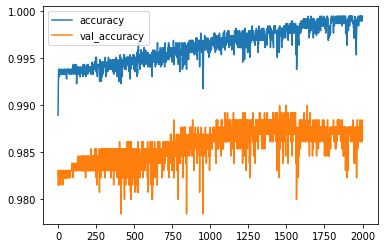

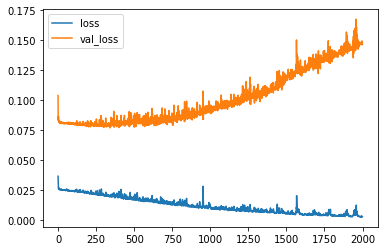

In [ ]:
df_hist = pd.DataFrame(hist4.history)
df_hist[['accuracy', 'val_accuracy']].plot()
df_hist[['loss', 'val_loss']].plot()

## 학습 자동 중단

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping 

# 학습 중단 설정 
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 모델의 저장 조건 설정 
model_path = 'data/model/wine3/' + '{epoch:02d}-{val_accuracy:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = model_path, verbose=1, save_best_only=True)

In [ ]:
# 딥러닝 모델 학습하기
hist5 = model.fit(X_train, t_train, epochs=2000, batch_size=500,
                  verbose=1, validation_split=0.25,
                  callbacks=[early_stopping_callback, checkpointer])

c:\Users\narae\Documents\Python\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/2000
6/8 [=====================>........] - ETA: 0s - loss: 0.0027 - accuracy: 0.9997
Epoch 1: val_loss did not improve from 0.14565
8/8 [==============================] - 1s 130ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.1497 - val_accuracy: 0.9869
Epoch 2/2000
7/8 [=========================>....] - ETA: 0s - loss: 0.0030 - accuracy: 0.9994
Epoch 2: val_loss did not improve from 0.14565
8/8 [==============================] - 1s 73ms/step - loss: 0.0030 - accuracy: 0.9995 - val_loss: 0.1461 - val_accuracy: 0.9877
Epoch 3/2000
5/8 [=================>............] - ETA: 0s - loss: 0.0020 - accuracy: 0.9996
Epoch 3: val_loss did not improve from 0.14565
8/8 [==============================] - 0s 59ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.1483 - val_accuracy: 0.9877
Epoch 4/2000
5/8 [=================>............] - ETA: 0s - loss: 0.0034 - accuracy: 0.9992
Epoch 4: val_loss did not improve from 0.14565
8/8 [==============================] - 1s 96ms/step

<AxesSubplot:>

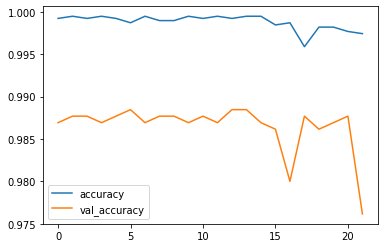

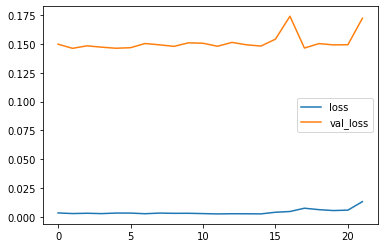

In [ ]:
df_hist = pd.DataFrame(hist5.history)
df_hist[['accuracy', 'val_accuracy']].plot()
df_hist[['loss', 'val_loss']].plot()

# Ames housing Data
* https://www.kaggle.com/datasets/prevek18/ames-housing-dataset

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping 
from sklearn.model_selection import train_test_split 
import pandas as pd 

# 데이터 불러오기 
df = pd.read_csv('data/house_train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

## 1) 데이터 정제

### 결측치 확인

In [ ]:
df.describe()
# 변수마다 count가 다른 것을 확인할 수 있다. => 결측치가 있다는 의미

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# 결측치 개수 파악하기 
df.isnull().sum().sort_values(ascending=False).head(15)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
dtype: int64

### One-hot encoding

In [ ]:
# 범주형 자료를 one hot encoding하기 위함. 결과는 범주형 자료는 맨 뒤로 감
# ※ 무엇이 1로 설정되었는지 반드시 확인이 필요함.
df_onehot = pd.get_dummies(df)
df_onehot.to_csv('data/housing_onehot.csv')

In [ ]:
# ex. MSZoning변수 
df.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [ ]:
pd.get_dummies(df[['MSZoning']])

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
1455,0,0,0,1,0
1456,0,0,0,1,0
1457,0,0,0,1,0
1458,0,0,0,1,0


### 상관관계 파악

In [ ]:
df_onehot.corr().sort_values('SalePrice', ascending=False)['SalePrice']

SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
                      ...   
MasVnrType_None    -0.374468
GarageFinish_Unf   -0.410608
BsmtQual_TA        -0.452394
KitchenQual_TA     -0.519298
ExterQual_TA       -0.589044
Name: SalePrice, Length: 290, dtype: float64

In [ ]:
## 관련도 높은 속성 이름 추출
df_corr_sort = df_onehot.corr()['SalePrice'].sort_values(ascending=False)
df_corr_sort[:6].keys()

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF'],
      dtype='object')

In [ ]:
# 분석에 사용할 변수 선택
columns = df_corr_sort[:6].keys()

### 결측치 처리 : Data Imputation (평균값 대체)

In [ ]:
# 결측값 조회 
df2 = df_onehot[columns]
df2.isnull().sum()

SalePrice      0
OverallQual    0
GrLivArea      0
GarageCars     0
GarageArea     0
TotalBsmtSF    0
dtype: int64

In [ ]:
# 평균값 대체 
# df2.fillna(X_train_pre.mean(axis=0), inplace=True)

## 2) 데이터 관계 파악

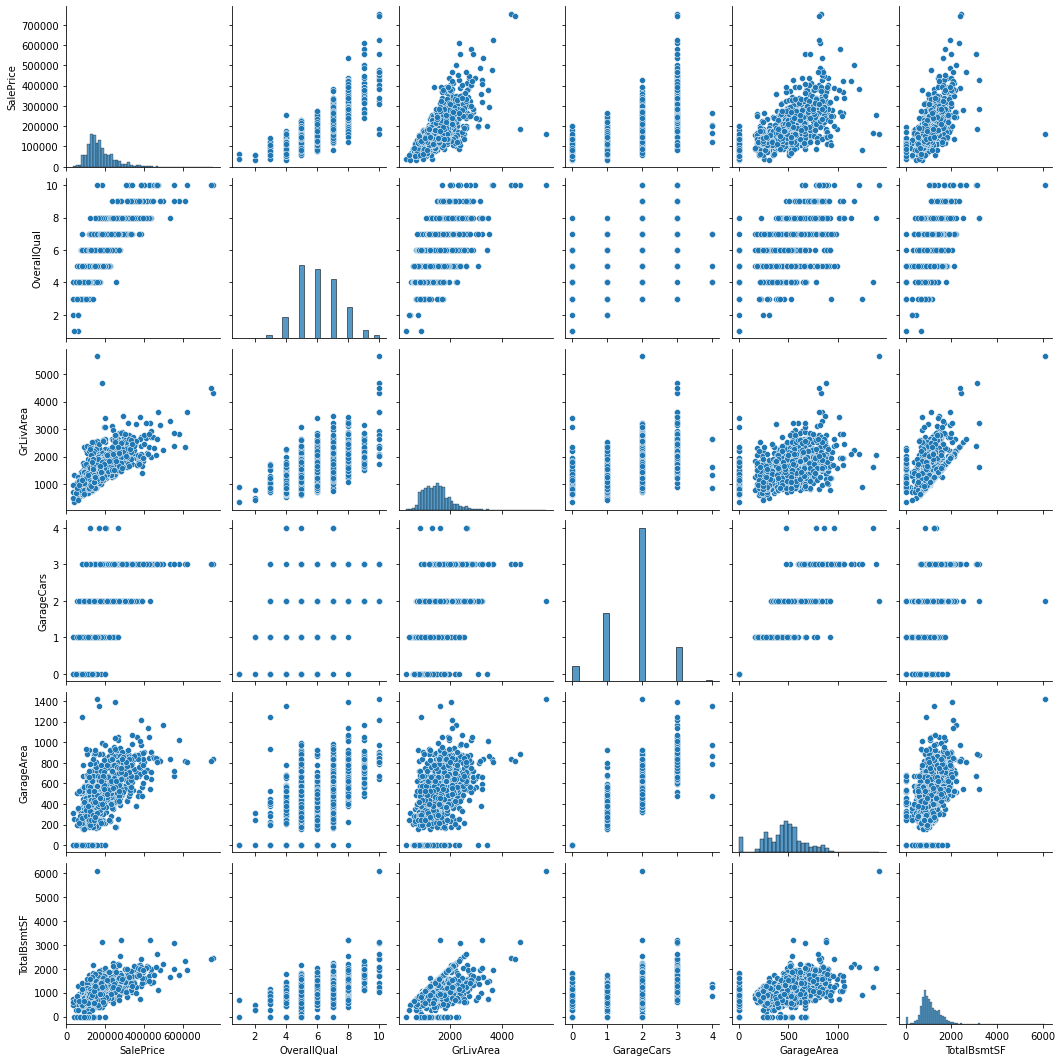

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.pairplot(df2)

In [ ]:
df2 = df_onehot[columns]
df2.isnull().sum()

SalePrice      0
OverallQual    0
GrLivArea      0
GarageCars     0
GarageArea     0
TotalBsmtSF    0
dtype: int64

## 3) 주택가격 예측 모델

In [ ]:
# 데이터 구분하기 
X = df2.iloc[:, 1:]
y = df2.iloc[:, 0]
print(X.shape, y.shape)

# 데이터 분할하기 
X_train, X_train, t_train, t_test = train_test_split(X, y, test_size=0.2, shuffle=True)
print(X_train.shape, X_train.shape, t_train.shape, t_test.shape)

# 모델 설정하기 
model = Sequential()
model.add(Dense(32, input_dim=5, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))                         # activation='linear'
model.summary()

# 모델 환경 설정하기(loss, optimizer, metrics 설정)
model.compile(loss='mean_squared_error', optimizer='adam')

(1460, 5) (1460,)
(292, 5) (292, 5) (1168,) (292,)
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 32)                192       
                                                                 
 dense_58 (Dense)            (None, 16)                528       
                                                                 
 dense_59 (Dense)            (None, 8)                 136       
                                                                 
 dense_60 (Dense)            (None, 1)                 9         
                                                                 
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 학습 중단 설정 
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 모델의 저장 조건 설정 
model_path = 'data/model/housing/' + '{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = model_path, verbose=1, save_best_only=True)

# 딥러닝 모델 학습하기
hist1 = model.fit(X_train, t_train, epochs=2000, batch_size=50,
                  verbose=1, validation_split=0.25,
                  callbacks=[early_stopping_callback, checkpointer])

c:\Users\narae\Documents\Python\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/2000
1/5 [=====>........................] - ETA: 20s - loss: 37970403328.0000
Epoch 1: val_loss improved from inf to 43113967616.00000, saving model to data/model/housing\01-43113967616.0000.hdf5
5/5 [==============================] - 7s 399ms/step - loss: 43403026432.0000 - val_loss: 43113967616.0000
Epoch 2/2000
1/5 [=====>........................] - ETA: 0s - loss: 45089837056.0000
Epoch 2: val_loss improved from 43113967616.00000 to 43040792576.00000, saving model to data/model/housing\02-43040792576.0000.hdf5
5/5 [==============================] - 1s 127ms/step - loss: 43325448192.0000 - val_loss: 43040792576.0000
Epoch 3/2000
1/5 [=====>........................] - ETA: 0s - loss: 45200965632.0000
Epoch 3: val_loss improved from 43040792576.00000 to 42962227200.00000, saving model to data/model/housing\03-42962227200.0000.hdf5
5/5 [==============================] - 0s 108ms/step - loss: 43244019712.0000 - val_loss: 42962227200.0000
Epoch 4/2000
1/5 [=====>.................

<AxesSubplot:>

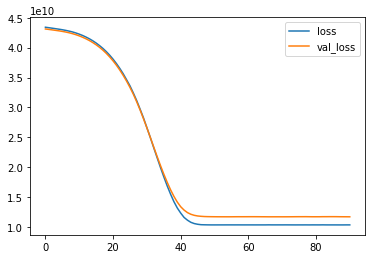

In [ ]:
# Plot
df_hist = pd.DataFrame(hist1.history)
df_hist.plot()

46/46 [==============================] - 1s 9ms/step


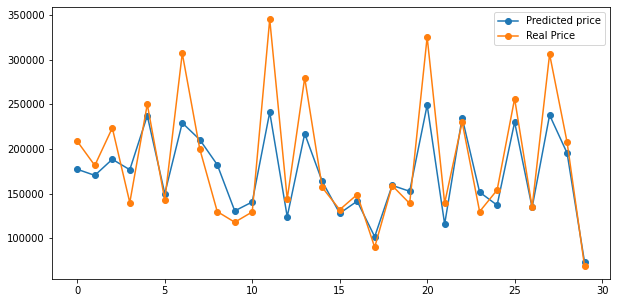

In [ ]:
# 딥러닝 모델 검증하기 (Train set으로)
ypred = model.predict(X.to_numpy()).flatten()
ytrue = y

fig = plt.figure(figsize=(10,5))

plt.plot(ypred[:30], 'o-', label='Predicted price')
plt.plot(ytrue[:30], 'o-', label='Real Price')
plt.legend()
plt.show()

46/46 [==============================] - 1s 8ms/step
실제가격: 208500.00, 예상가격: 177216.44
실제가격: 181500.00, 예상가격: 170394.50
실제가격: 223500.00, 예상가격: 188429.91
실제가격: 140000.00, 예상가격: 176729.44
실제가격: 250000.00, 예상가격: 237172.97
실제가격: 143000.00, 예상가격: 150055.16
실제가격: 307000.00, 예상가격: 229162.45
실제가격: 200000.00, 예상가격: 210380.91
실제가격: 129900.00, 예상가격: 182332.98
실제가격: 118000.00, 예상가격: 130654.43
실제가격: 129500.00, 예상가격: 140661.41
실제가격: 345000.00, 예상가격: 241033.53
실제가격: 144000.00, 예상가격: 124184.39
실제가격: 279500.00, 예상가격: 217062.56
실제가격: 157000.00, 예상가격: 163702.75
실제가격: 132000.00, 예상가격: 127956.02
실제가격: 149000.00, 예상가격: 141568.50
실제가격: 90000.00, 예상가격: 101796.91
실제가격: 159000.00, 예상가격: 159236.59
실제가격: 139000.00, 예상가격: 152577.78
실제가격: 325300.00, 예상가격: 249066.45
실제가격: 139400.00, 예상가격: 115846.38
실제가격: 230000.00, 예상가격: 234978.31
실제가격: 129900.00, 예상가격: 151615.66
실제가격: 154000.00, 예상가격: 137059.91


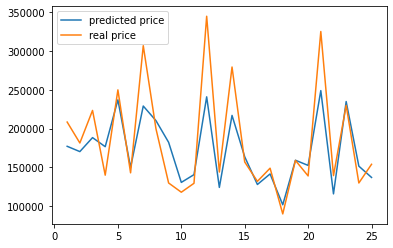

In [ ]:
# 예측 값과 실제 값, 실행 번호가 들어갈 빈 리스트를 만듭니다.
real_prices =[]
pred_prices = []
X_num = []

# 25개의 샘플을 뽑아 실제 값, 예측 값을 출력해 봅니다. 
n_iter = 0
Y_prediction = model.predict(X.to_numpy()).flatten()
for i in range(25):
    real = y[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.2f}, 예상가격: {:.2f}".format(real, prediction))
    real_prices.append(real)
    pred_prices.append(prediction)
    n_iter = n_iter + 1
    X_num.append(n_iter)
#그래프를 통해 샘플로 뽑은 25개의 값을 비교해 봅니다.

plt.plot(X_num, pred_prices, label='predicted price')
plt.plot(X_num, real_prices, label='real price')
plt.legend()
plt.show()


# KNN, k-최근접 이웃(지도학습)

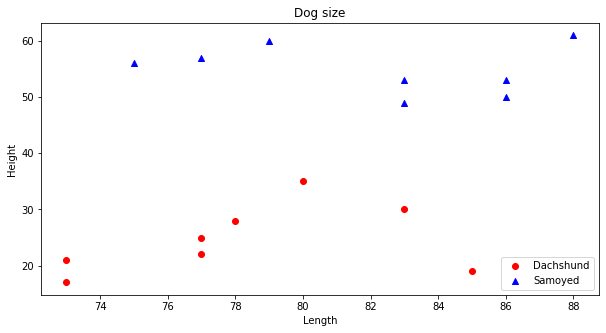

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 닥스훈트 개의 길이와 높이 데이터
dach_length = [77, 78, 85, 83, 73, 77, 73, 80]
dach_height = [25, 28, 19, 30, 21, 22, 17, 35]
# 사모예드 개의 길이와 높이 데이터
samo_length = [75, 77, 86, 86, 79, 83, 83, 88]
samo_height = [56, 57, 50, 53, 60, 53, 49, 61]

# Plot
fig = plt.figure(figsize=(10, 5))
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(samo_length, samo_height,c='blue',marker='^', label='Samoyed')

plt.xlabel('Length')              
plt.ylabel('Height')              
plt.title("Dog size")
plt.legend(loc='lower right')

plt.show()


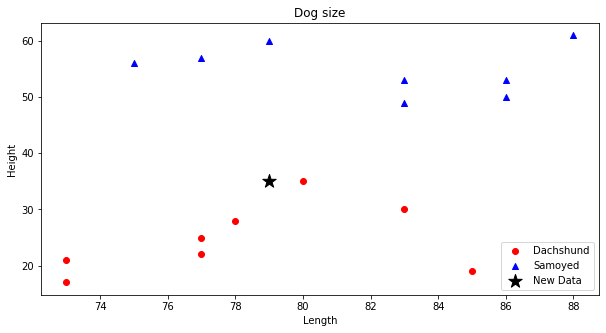

In [ ]:
newdata_length = [79]
newdata_height = [35]

# Plot
fig = plt.figure(figsize=(10, 5))
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(samo_length, samo_height,c='blue',marker='^', label='Samoyed')
plt.scatter(newdata_length, newdata_height, marker='*', s=200, c='k', label='New Data')

plt.xlabel('Length')              
plt.ylabel('Height')              
plt.title("Dog size")
plt.legend(loc='lower right')

plt.show()